In [1]:
import numpy as np
import pandas as pd


In [2]:
import os
for dirname, _, filename in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [3]:
df=pd.read_csv('train 2.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(42000, 785)

In [6]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
38509,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
import matplotlib.pyplot as plt

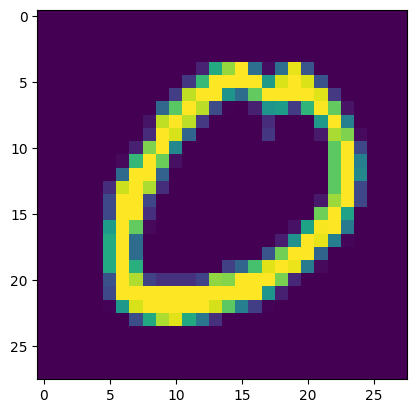

In [8]:
plt.imshow(df.iloc[13051,1:].values.reshape(28,28))

In [9]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
X_train.shape

(33600, 784)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn=KNeighborsClassifier()

In [14]:
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [15]:
import time
start=time.time()
y_pred=knn.predict(X_test)
print(time.time()-start)

5.35156512260437


In [16]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [18]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [19]:
#PCA
from sklearn.decomposition import PCA
pca=PCA(n_components=200)

In [20]:
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [21]:
X_train_trf.shape

(33600, 200)

In [22]:
knn=KNeighborsClassifier()

In [23]:
knn.fit(X_train_trf,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [24]:
y_pred=knn.predict(X_test_trf)

In [25]:
accuracy_score(y_test,y_pred)

0.9507142857142857

In [26]:
#Transforming to a 2D coordinate system
pca=PCA(n_components=2)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [27]:
X_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

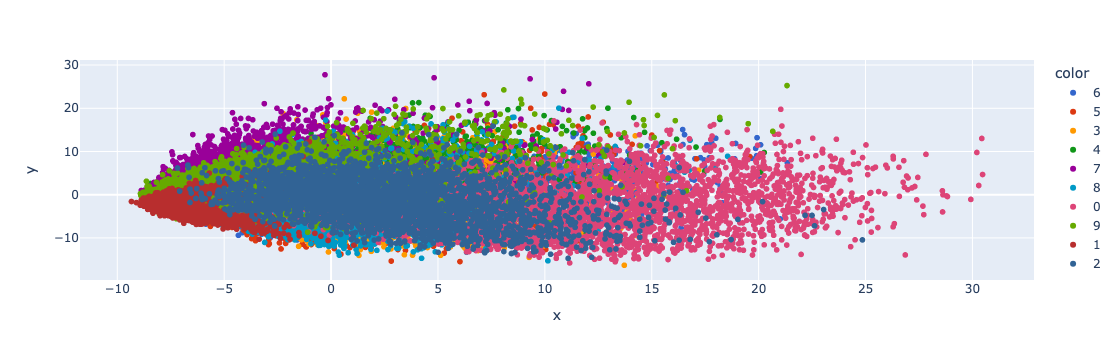

In [30]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter(x=X_train_trf[:,0],
               y=X_train_trf[:,1],
               color=y_train_trf,
               color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [31]:
#transforming in 3D
pca=PCA(n_components=3)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)

In [32]:
X_train_trf

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]])

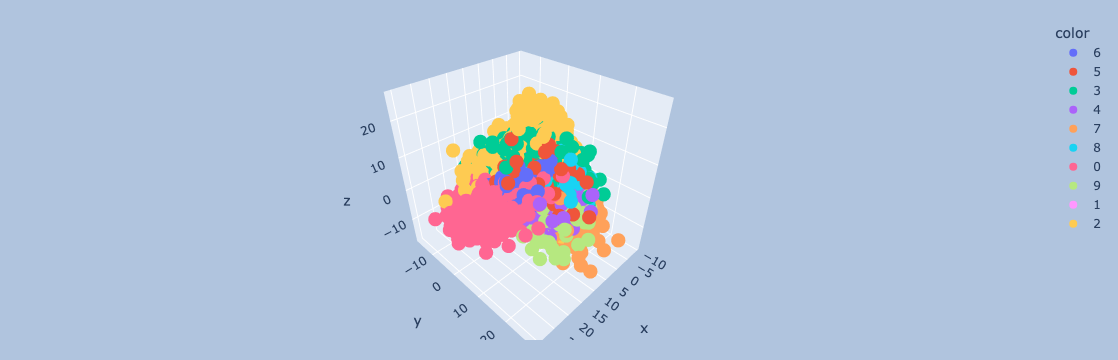

In [35]:
import plotly.express as px
y_train_trf=y_train.astype(str)
fig=px.scatter_3d(x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],color=y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20),paper_bgcolor='LightSteelBlue')
fig.show()


In [36]:
pca.explained_variance_
#Eigen values

array([40.67111198, 29.17023401, 26.74459621])

In [37]:
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [38]:
pca=PCA(n_components=None)
X_train_trf=pca.fit_transform(X_train)
X_test_trf=pca.transform(X_test)